1: Importação das Bibliotecas e Carregar a base de dados no Google Colab

In [87]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [28]:
df = pd.read_excel('/content/Base Logistica.xlsx', index_col='Viagem')
df

,Data Pedido,Data Entrega,Prazo Entrega,Tempo Entrega,Status Entrega,UF,Tipo Veículo,Valor do Frete,Km,Custos
Viagem,,,,,,,,,,
1,2018-01-01,2018-01-11,11,10,No Prazo,SP,TRUCK,562.70,12.51,56.27
2,2018-01-01,2018-01-10,3,9,Atrasada,SP,VUC,1220.10,20.49,122.01
3,2018-01-01,2018-01-04,10,3,No Prazo,RJ,3/4,18.66,0.76,6.22
4,2018-01-01,2018-01-02,12,1,No Prazo,SP,TOCO,1054.71,19.91,117.19
5,2018-01-01,2018-01-06,6,5,No Prazo,SP,TOCO,38.00,5.11,7.60
...,...,...,...,...,...,...,...,...,...,...
58976,2019-12-30,2019-12-31,11,1,No Prazo,MG,3/4,651.75,26.55,130.35
58977,2019-12-30,2019-12-31,8,1,No Prazo,SP,TOCO,452.10,7.93,45.21
58978,2019-12-30,2019-12-31,5,1,No Prazo,ES,3/4,55.08,5.52,18.36


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58980 entries, 1 to 58980
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Pedido     58980 non-null  datetime64[ns]
 1   Data Entrega    58980 non-null  datetime64[ns]
 2   Prazo Entrega   58980 non-null  int64         
 3   Tempo Entrega   58980 non-null  int64         
 4   Status Entrega  58980 non-null  object        
 5   UF              58980 non-null  object        
 6   Tipo Veículo    58980 non-null  object        
 7   Valor do Frete  58980 non-null  float64       
 8   Km              58980 non-null  float64       
 9   Custos          58980 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 4.9+ MB


In [38]:
#Calculando o valor total do Frete
total_frete = df['Valor do Frete'].sum()
print(f'O total do frete é de R$: {total_frete:.2f}')

O total do frete é de R$: 13592954.56


In [85]:
#Calcular a quantidade de viagens realizadas
qtd_viagens = df['Status Entrega'].count()
print(f'A quantidade de viagens é de: {qtd_viagens}')

A quantidade de viagens é de: 58980


In [43]:
# Calcular a quantidade de viagens realizadas no prazo e atrasadas
viagens_atrasadas = df.groupby('Status Entrega')['Status Entrega'].count()
print(viagens_atrasadas)


Status Entrega
Atrasada    19016
No Prazo    39964
Name: Status Entrega, dtype: int64


In [55]:
#% de viagens no prazo e atrasada
percentual_entregas = df['Status Entrega'].value_counts(normalize=True) * 100
print(percentual_entregas)

Status Entrega
No Prazo    67.758562
Atrasada    32.241438
Name: proportion, dtype: float64


In [53]:
# quantidade de viagens atrasadas por estado
qtd_viagens_atrasadas_estado = df.groupby('UF')['Status Entrega'].count().sort_values(ascending=False)
print(qtd_viagens_atrasadas_estado)

UF
SP    19118
RJ    14409
ES    13397
MG    12056
Name: Status Entrega, dtype: int64


In [52]:
# Quantidade de Viagens atrasadas por tipo de veículo
qtd_viagens_atrasadas_marca = df.groupby('Tipo Veículo')['Status Entrega'].count().sort_values(ascending=False)
print(qtd_viagens_atrasadas_marca)

Tipo Veículo
TOCO       18912
TRUCK      12919
CARRETA    10613
VUC         9336
3/4         7200
Name: Status Entrega, dtype: int64


In [75]:
# Faturamento por tipo de veículo
faturamento_frete_marca = df.groupby('Tipo Veículo')['Valor do Frete'].sum().sort_values(ascending=False)
print(faturamento_frete_marca)

Tipo Veículo
TOCO       4263620.94
TRUCK      2975961.39
CARRETA    2517513.15
VUC        2172641.86
3/4        1663217.22
Name: Valor do Frete, dtype: float64


In [54]:
# calcular o a média de KM
media_km = df['Km'].mean()
print(f'A média de km é de: {media_km:.2f}')

A média de km é de: 7.63


In [64]:
# identificar qual foi o maior custo
maior_custo = df['Valor do Frete'].max()
print(f'O maior custo é de: {maior_custo:.2f}')

O maior custo é de: 2095.80


In [65]:
# identificar qual foi o menor custo
menor_custo = df['Valor do Frete'].min()
print(f'O menor custo é de: {menor_custo:.2f}')

O menor custo é de: 0.90


Visualização dos dados

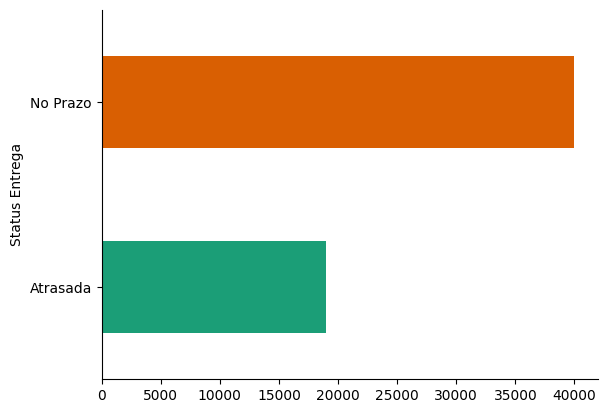

In [68]:
# @title Status Entrega

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Status Entrega').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

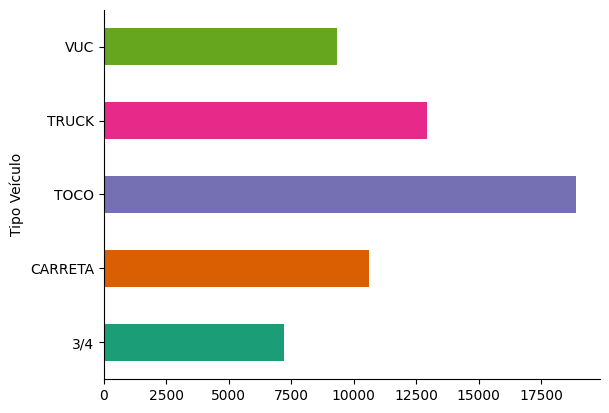

In [72]:
# @title Tipo Veículo

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Tipo Veículo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

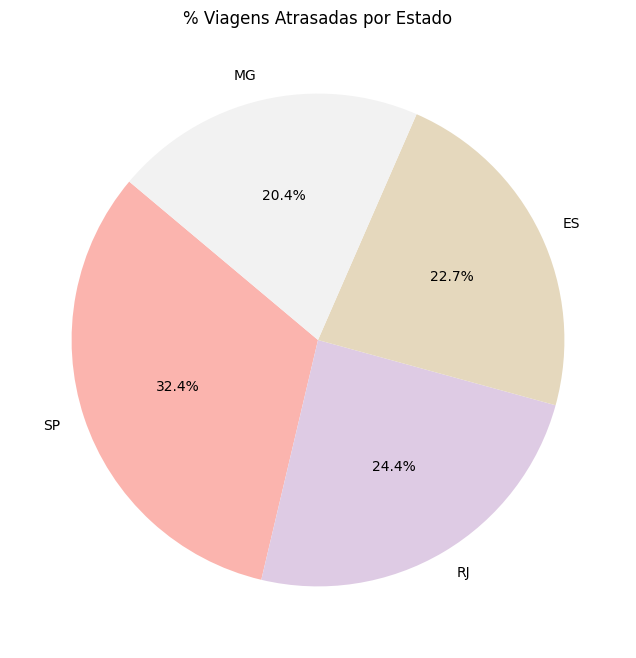

In [77]:
#viajens atrasadas por estado
plt.figure(figsize=(8, 8))
qtd_viagens_atrasadas_estado.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Pastel1')
plt.title('% Viagens Atrasadas por Estado')
plt.ylabel('')  # Remover o rótulo do eixo y
plt.show()

In [76]:
grafico = px.bar(faturamento_frete_marca, x=faturamento_frete_marca.index, y=faturamento_frete_marca.values)
grafico.show()

In [83]:
vendas_temporal = df.groupby(['Data Entrega'])['Valor do Frete'].sum()
display(vendas_temporal)

,Valor do Frete
Data Entrega,
2018-01-02,5870.14
2018-01-03,6716.01
2018-01-04,7333.95
2018-01-05,6237.13
2018-01-06,7642.71
...,...
2019-12-28,34056.86
2019-12-29,27245.51
2019-12-30,23872.37


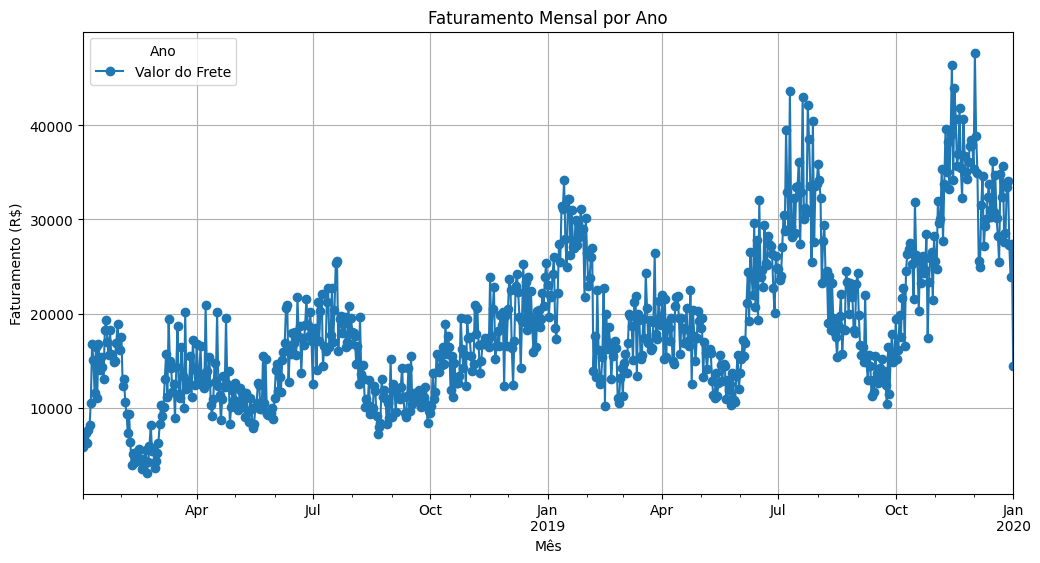

In [84]:
vendas_temporal.T.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Faturamento Mensal por Ano')
plt.xlabel('Mês')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Ano')
plt.grid()
plt.show()